In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from itertools import cycle
import matplotlib.gridspec as gridspec

This notebook is used to make the plots for Rosalind's presentation.  Firstly, a comparison between the effects of N* = 0.7 and 1.17, similar to the 
stochastic versions of fig 4c and 4d from the bftt paper

In [2]:
max_gRate = 0.083 #max growth rate of the bacteria
K = 1000 #carrying capacity for the regular simulations
big_K = 10000 #carring capacity for the big_K simulations
duration_fig4 = 100. #duration of the simulations used for the figure 4 plots

In [13]:
#both parameter sets use the same set of immigration rates
#the 4c sets are for N* = 1.17, 4d is N* = 0.7
r_imm = [0.4, 0.5, 0.6, 0.7]

fig4c_rImm_0_4 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_4-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_5 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_5-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_6 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_6-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_7 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_7-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_pops = [fig4c_rImm_0_4, fig4c_rImm_0_5, fig4c_rImm_0_6, fig4c_rImm_0_7]

fig4d_rImm_0_4 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_4-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_5 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_5-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_6 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_6-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_7 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_7-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_pops = [fig4d_rImm_0_4, fig4d_rImm_0_5, fig4d_rImm_0_6, fig4d_rImm_0_7]

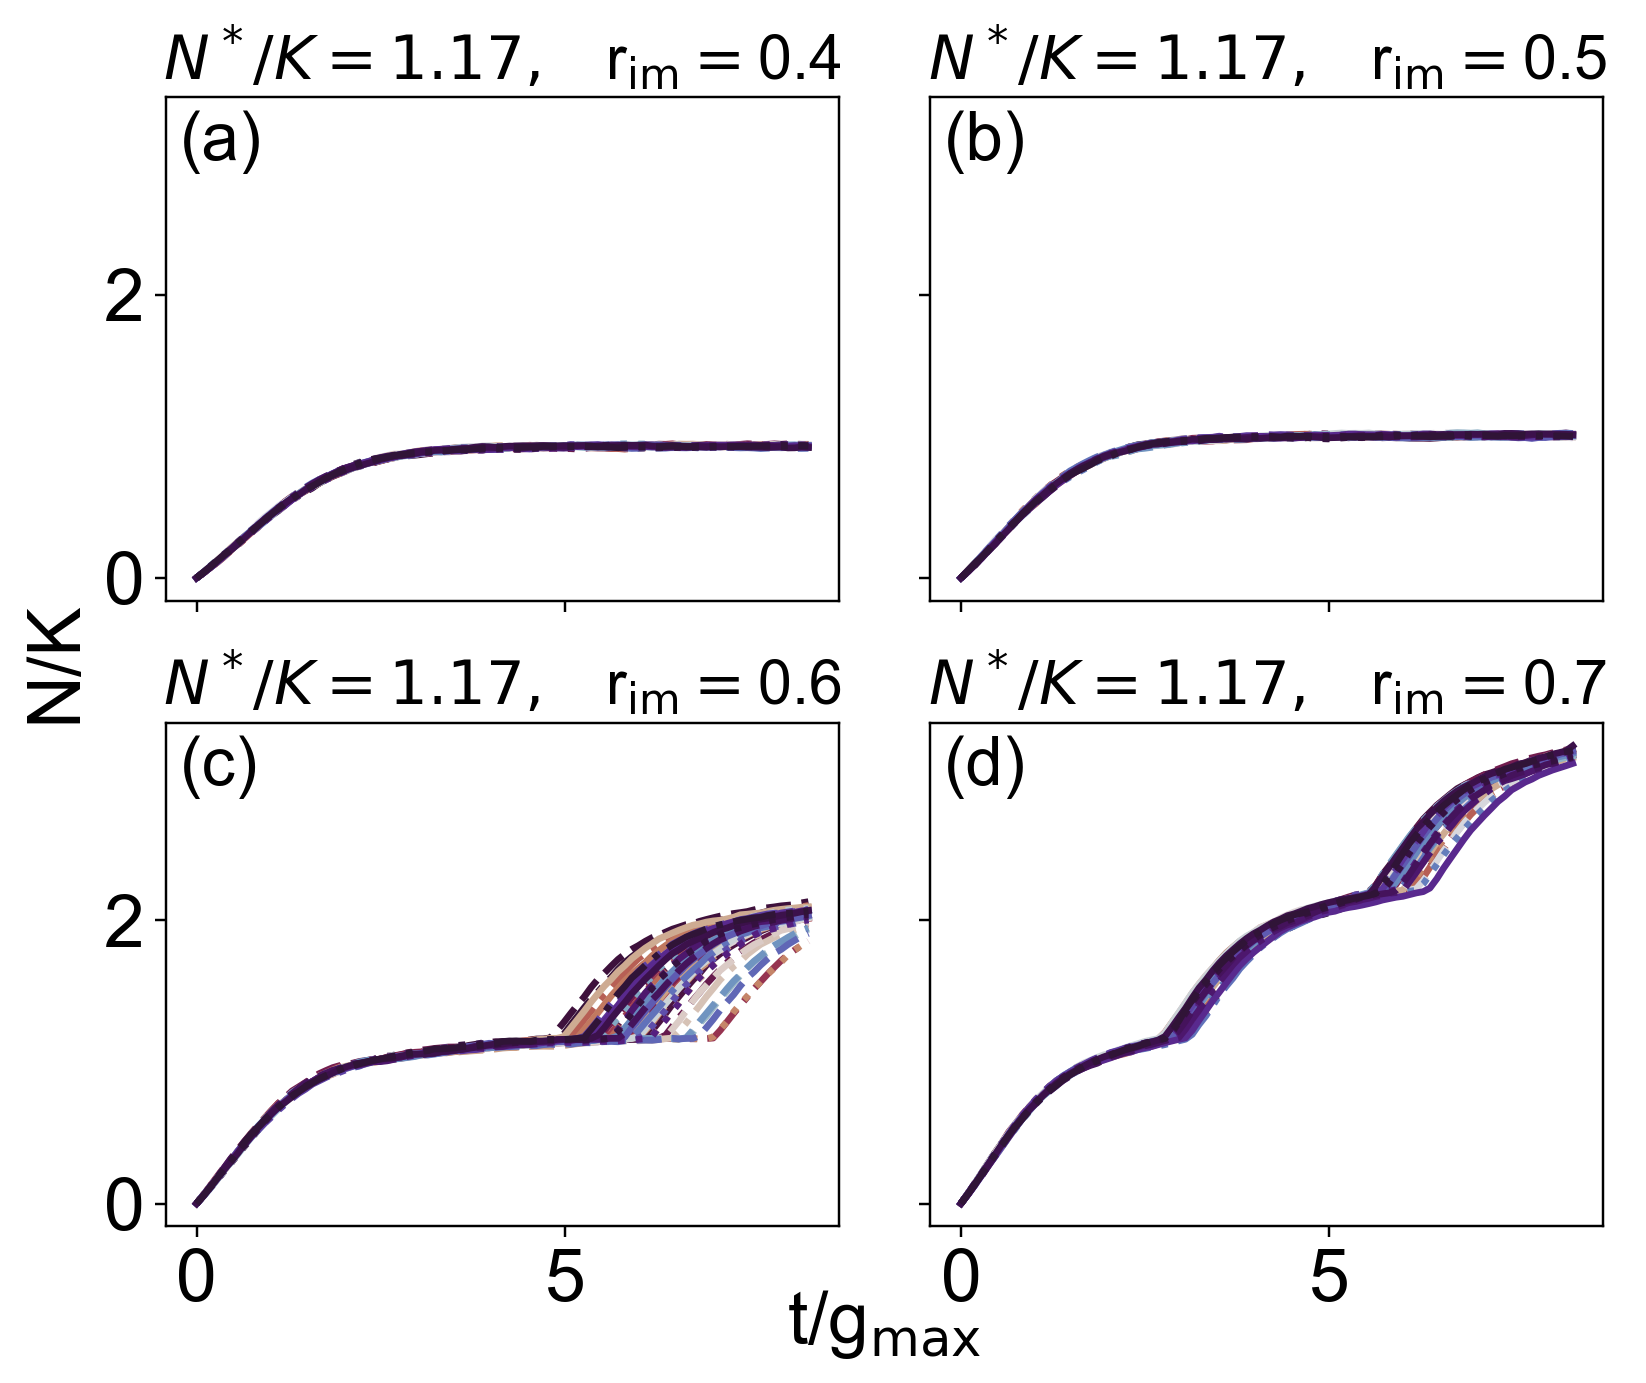

In [27]:
#here we'll plot the stochastic pops over time in a nicer looking format
#this one is for figure 4c
fig, axs = plt.subplots(2,2, figsize=(8,7), dpi=220, sharex=True, sharey=True)
plt.rcParams['font.sans-serif'] = "Arial"
K_val = 10000
i = 0
letters = ['a', 'b', 'c', 'd']

for ax in axs.flat:

    pop_dataset = fig4c_pops[i]
    #deterministic_pops = deterministicPops_4c_list[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::-1])
    for p in range(nCols):

        ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        
    #ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2.2, color='#ff0066')
    
    
    ax.set_title("$N^*/K = 1.17, \;\;$ r$_{\\rm im} = $"+str(r_imm[i]), fontsize = 20)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    
    i = i+1

fig = plt.gcf()
#fig.suptitle("Title centered above all subplots", fontsize=24)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("t/g$_{\max}$", fontsize=24)
plt.ylabel("N/K", fontsize=24)


plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('allen_plots/N_thresh_1.17.pdf', bbox_inches="tight")
plt.show()

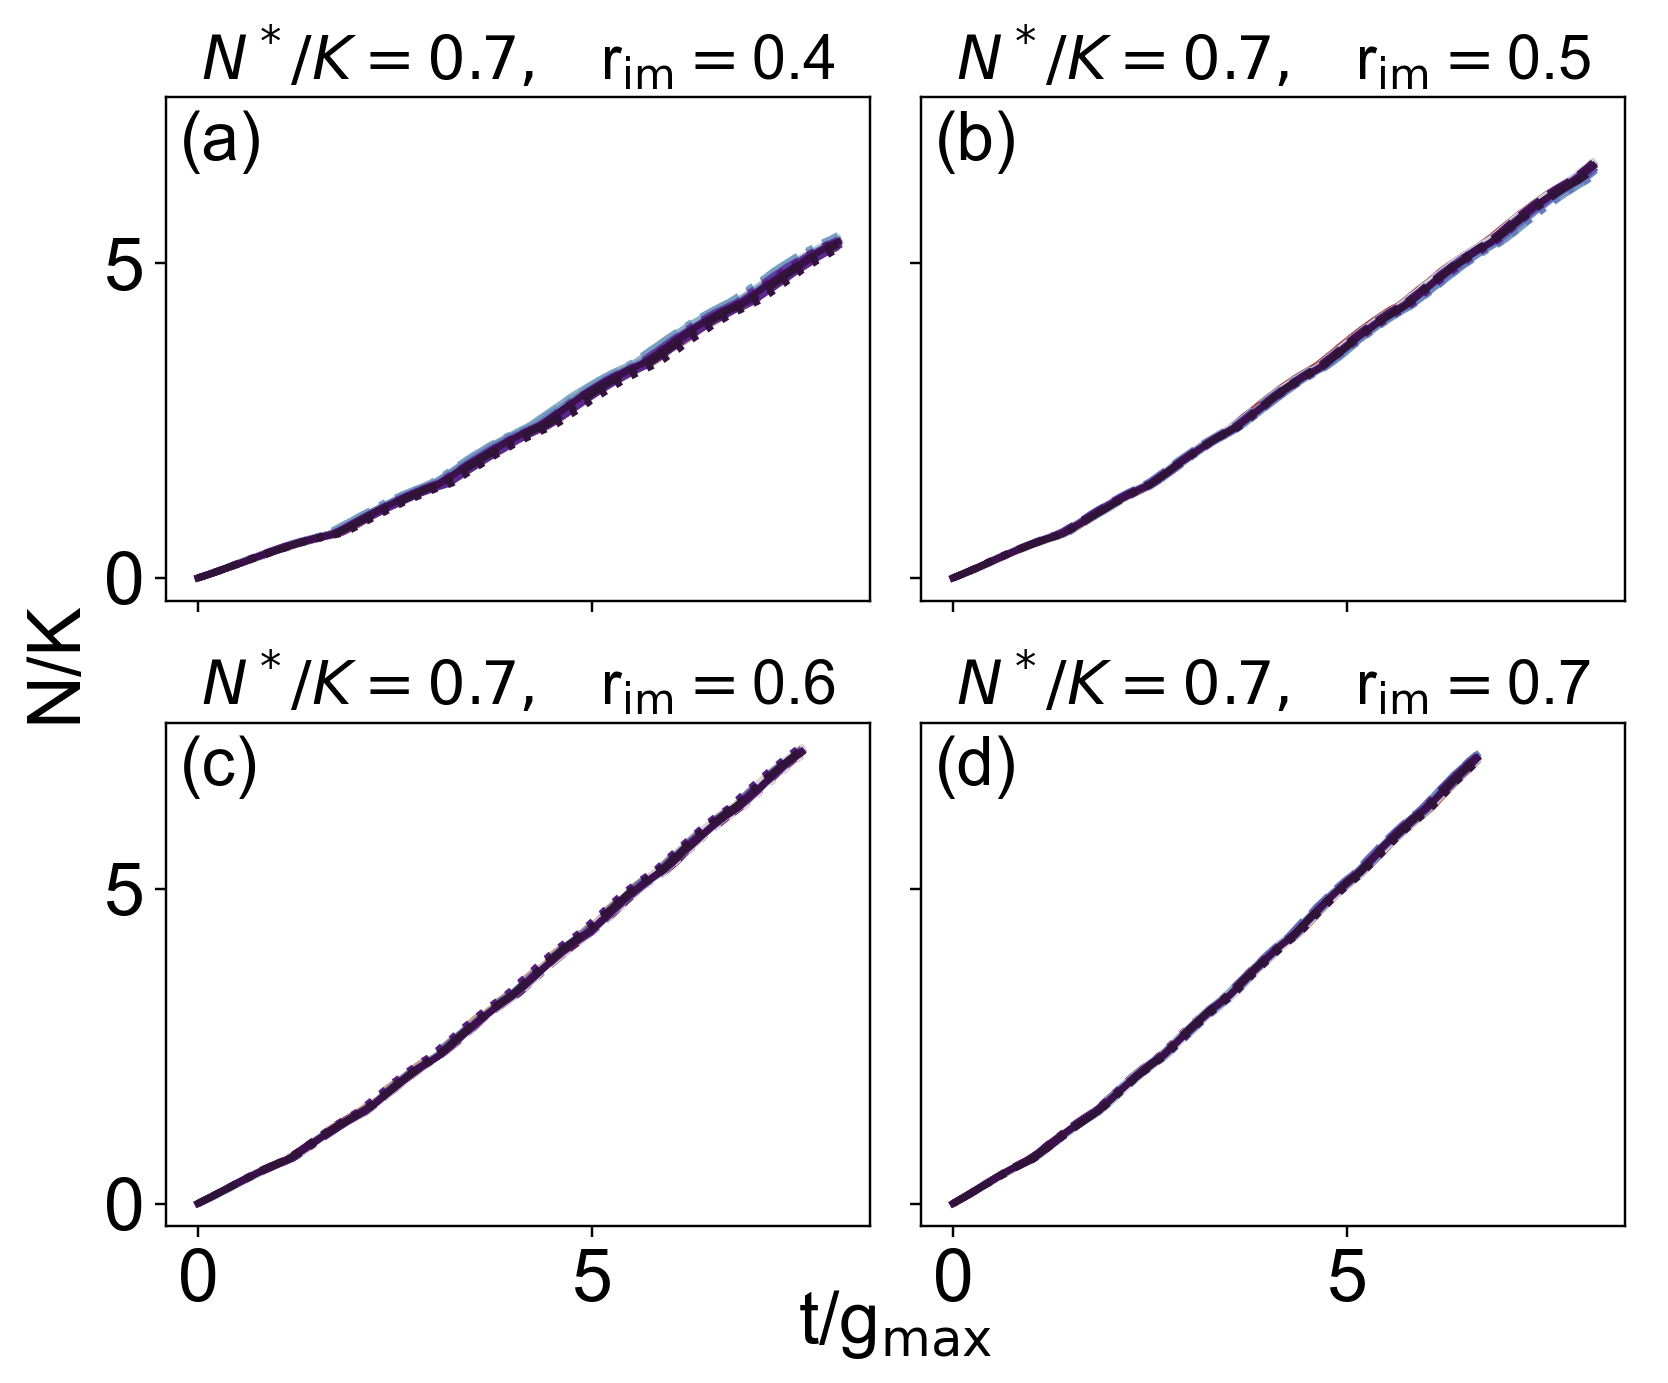

In [29]:
#here we'll plot the stochastic pops over time in a nicer looking format
#this one is for figure 4d
fig, axs = plt.subplots(2,2, figsize=(8,7), dpi=220, sharex=True, sharey=True)
plt.rcParams['font.sans-serif'] = "Arial"
K_val = 10000
i = 0
letters = ['a', 'b', 'c', 'd']

for ax in axs.flat:

    pop_dataset = fig4d_pops[i]
    #deterministic_pops = deterministicPops_4c_list[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::-1])
    for p in range(nCols):
        #print((pop_dataset[str(p)][:-2]))
        ax.plot(pop_dataset['t'][:-2]*max_gRate, pd.to_numeric(pop_dataset[str(p)][:-2])/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        
    #ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2.2, color='#ff0066')
    
    
    ax.set_title("$N^*/K = 0.7, \;\;$ r$_{\\rm im} = $"+str(r_imm[i]), fontsize = 20)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    
    i = i+1

fig = plt.gcf()
#fig.suptitle("Title centered above all subplots", fontsize=24)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("t/g$_{\max}$", fontsize=24)
plt.ylabel("N/K", fontsize=24)


plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('allen_plots/N_thresh_0.7.pdf', bbox_inches="tight")
plt.show()